In [51]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import datetime

In [52]:
#Loading and visualizing the data
data=pd.read_csv('Google Stock Prediction data.csv')
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0,1
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0,1
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0,1
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0,1


In [53]:
#Removing all columns except the required ('date' and 'close') ones
data=data[['date','close']]
data

,date,close
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71
...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09
1254,2021-06-08 00:00:00+00:00,2482.85
1255,2021-06-09 00:00:00+00:00,2491.40
1256,2021-06-10 00:00:00+00:00,2521.60


In [54]:
#The 'date' column consists of the unnecessary 'time' segment. Hence, we remove that
def str_to_datetime(s):
  split=s.split('-')
  year,month,day=int(split[0]),int(split[1]),split[2]
  split=day.split(' ')
  day=int(split[0])
  return datetime.datetime(year=year,month=month,day=day)

datetime_object=str_to_datetime('2016-06-14 00:00:00+00:00')
datetime_object

datetime.datetime(2016, 6, 14, 0, 0)

In [55]:
#Converting the 'date' column to a usable format
data['date']=data['date'].apply(str_to_datetime)
data['date']

<ipython-input-55-ce12b13bf032>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=data['date'].apply(str_to_datetime)


0      2016-06-14
1      2016-06-15
2      2016-06-16
3      2016-06-17
4      2016-06-20
          ...    
1253   2021-06-07
1254   2021-06-08
1255   2021-06-09
1256   2021-06-10
1257   2021-06-11
Name: date, Length: 1258, dtype: datetime64[ns]

In [56]:
#Setting the date as the index
data.index=data.pop('date')
data

,close
date,
2016-06-14,718.27
2016-06-15,718.92
2016-06-16,710.36
2016-06-17,691.72
2016-06-20,693.71
...,...
2021-06-07,2466.09
2021-06-08,2482.85
2021-06-09,2491.40


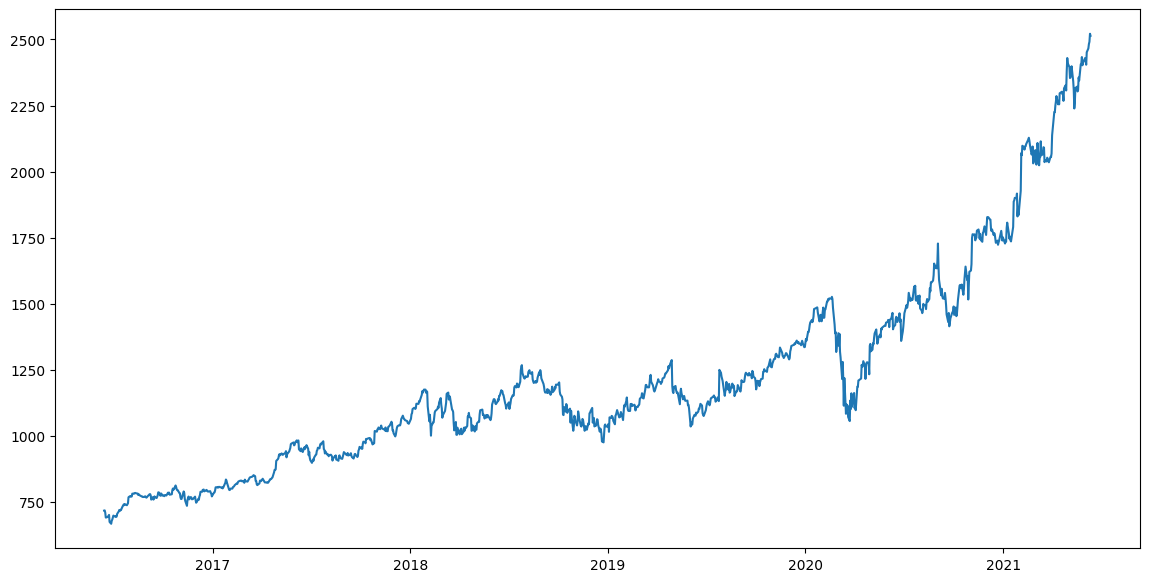

In [57]:
#Visualizing the data
plt.figure(figsize=(14, 7))
plt.plot(data.index,data['close'])

<ipython-input-58-c3971921faa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close'] = scaler.fit_transform(data['close'].values.reshape(-1, 1))


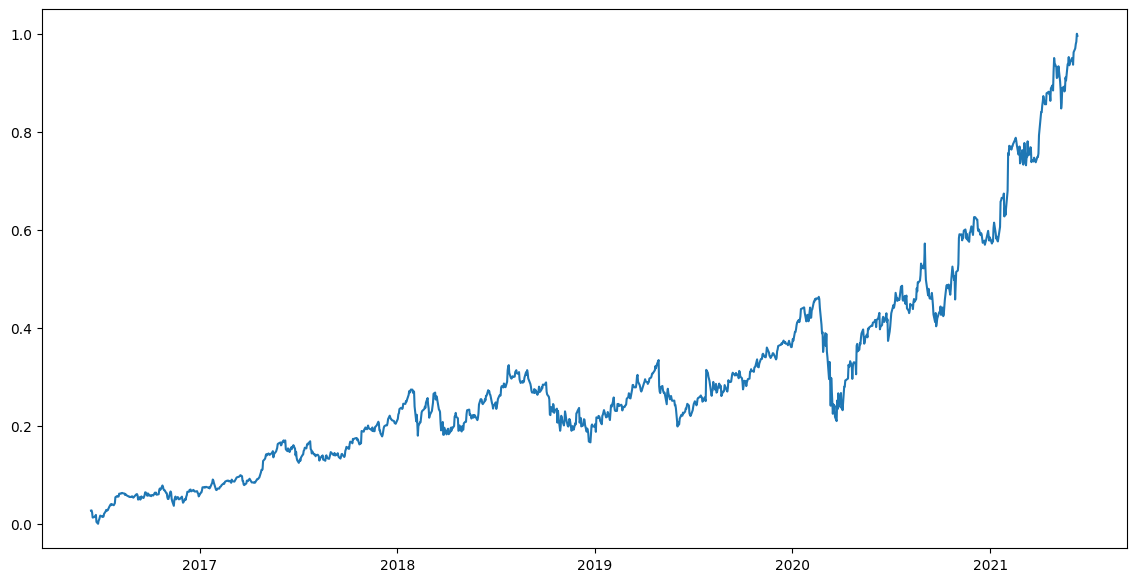

In [58]:
#For faster convergence, we can normalise the data between 0 and 1, and transform it again later
scaler = MinMaxScaler()
data['close'] = scaler.fit_transform(data['close'].values.reshape(-1, 1))
plt.figure(figsize=(14, 7))
plt.plot(data.index,data['close'])

In [59]:
#Defining a windowed function
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)
  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['close'].to_numpy()
    x, y = values[:-1], values[-1]
    dates.append(target_date)
    X.append(x)
    Y.append(y)
    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date >= last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(data, '2016-06-17', '2021-06-11', n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2016-06-17,0.026984,0.027334,0.022716,0.012658
1,2016-06-20,0.027334,0.022716,0.012658,0.013732
2,2016-06-21,0.022716,0.012658,0.013732,0.014935
3,2016-06-22,0.012658,0.013732,0.014935,0.015755
4,2016-06-23,0.013732,0.014935,0.015755,0.018135
...,...,...,...,...,...
1250,2021-06-07,0.945871,0.936876,0.962317,0.970049
1251,2021-06-08,0.936876,0.962317,0.970049,0.979092
1252,2021-06-09,0.962317,0.970049,0.979092,0.983705
1253,2021-06-10,0.970049,0.979092,0.983705,1.000000


In [60]:
#Converting the windowed dataframe to date, X and Y
def windowed_df_to_date_X_Y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()
  dates = df_as_np[:, 0]
  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
  Y = df_as_np[:, -1]
  return dates, X.astype(np.float32), Y.astype(np.float32)


dates,X,Y= windowed_df_to_date_X_Y(windowed_df)
dates.shape, X.shape,Y.shape

((1255,), (1255, 3, 1), (1255,))

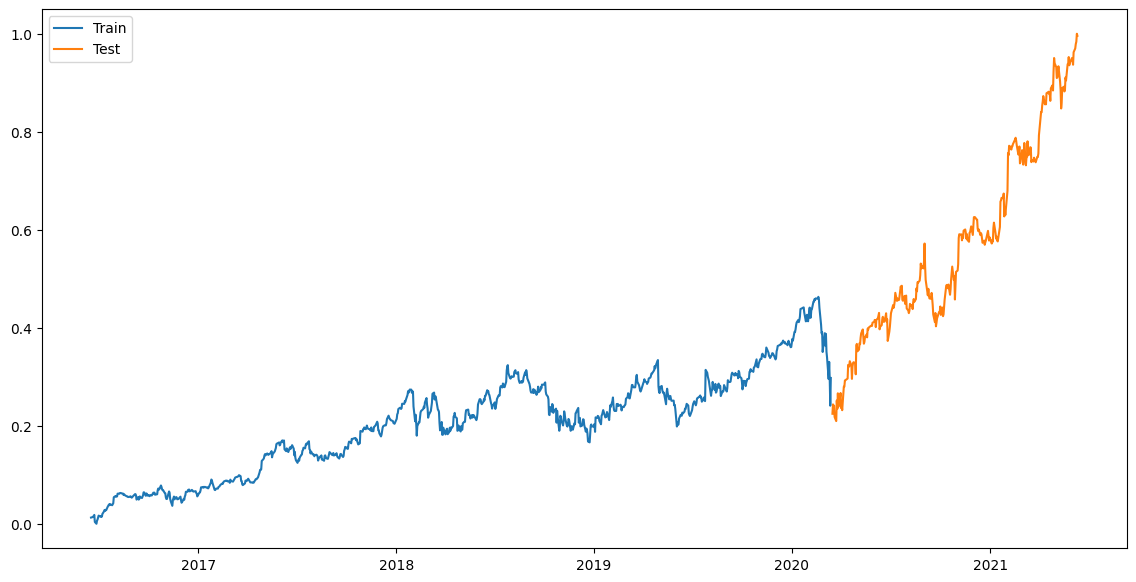

In [61]:
#Splitting the data into 75% training and 25% test (including 10% for validation)
q_75 = int(len(dates) * .75)
q_90 = int(len(dates) * .9)

dates_train, X_train, Y_train = dates[:q_75], X[:q_75], Y[:q_75]
dates_val, X_val, Y_val = dates[q_75:q_90], X[q_75:q_90], Y[q_75:q_90]
dates_test, X_test, Y_test = dates[q_75:], X[q_75:], Y[q_75:]

plt.figure(figsize=(14, 7))
plt.plot(dates_train,Y_train)
plt.plot(dates_test,Y_test)
plt.legend(['Train','Test'])

In [62]:
#Defining and compiling the model
model=Sequential([
      layers.Input((3, 1)),
      layers.LSTM(128, return_sequences=True),
      layers.LSTM(64),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
    ])

#We use mse and adam optimizer here
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train,Y_train,validation_data=(X_val, Y_val),epochs=200)

Epoch 1/200
30/30 [==============================] - 6s 48ms/step - loss: 0.0156 - mean_absolute_error: 0.0952 - val_loss: 0.0382 - val_mean_absolute_error: 0.1841
Epoch 2/200
30/30 [==============================] - 0s 16ms/step - loss: 0.0027 - mean_absolute_error: 0.0392 - val_loss: 4.8568e-04 - val_mean_absolute_error: 0.0166
Epoch 3/200
30/30 [==============================] - 0s 15ms/step - loss: 2.2766e-04 - mean_absolute_error: 0.0113 - val_loss: 4.9062e-04 - val_mean_absolute_error: 0.0172
Epoch 4/200
30/30 [==============================] - 1s 21ms/step - loss: 1.7054e-04 - mean_absolute_error: 0.0096 - val_loss: 4.7370e-04 - val_mean_absolute_error: 0.0170
Epoch 5/200
30/30 [==============================] - 1s 23ms/step - loss: 1.4983e-04 - mean_absolute_error: 0.0088 - val_loss: 4.6078e-04 - val_mean_absolute_error: 0.0165
Epoch 6/200
30/30 [==============================] - 1s 21ms/step - loss: 1.5838e-04 - mean_absolute_error: 0.0091 - val_loss: 4.6843e-04 - val_mean_abs

30/30 [==============================] - 2s 5ms/step


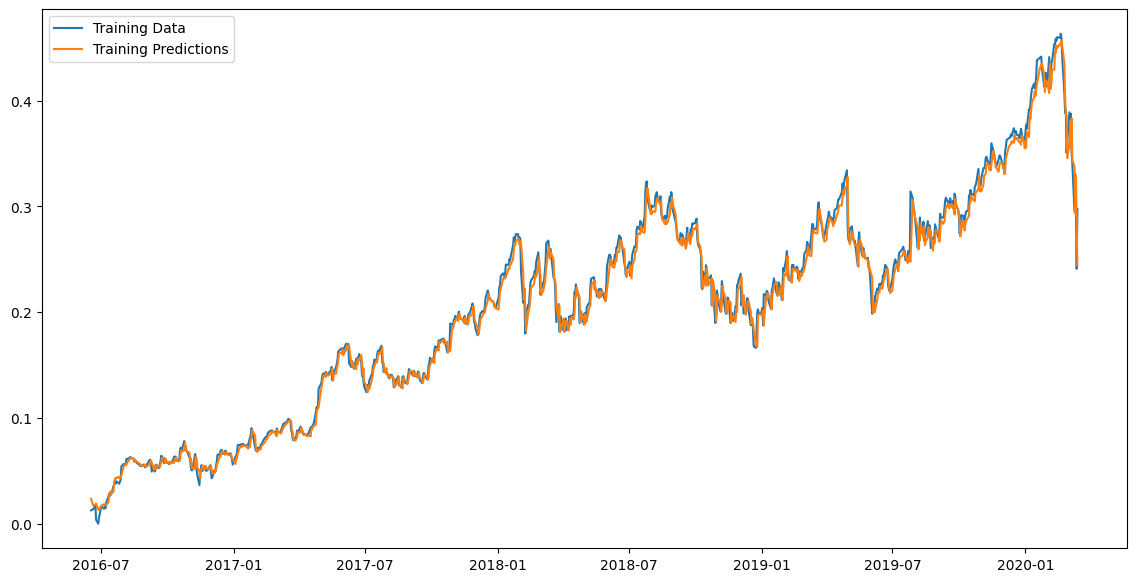

In [63]:
#Making and plotting the predictions for training dataset
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(14, 7))
plt.plot(dates_train,Y_train)
plt.plot(dates_train,train_predictions)
plt.legend(['Training Data','Training Predictions'])

6/6 [==============================] - 0s 5ms/step


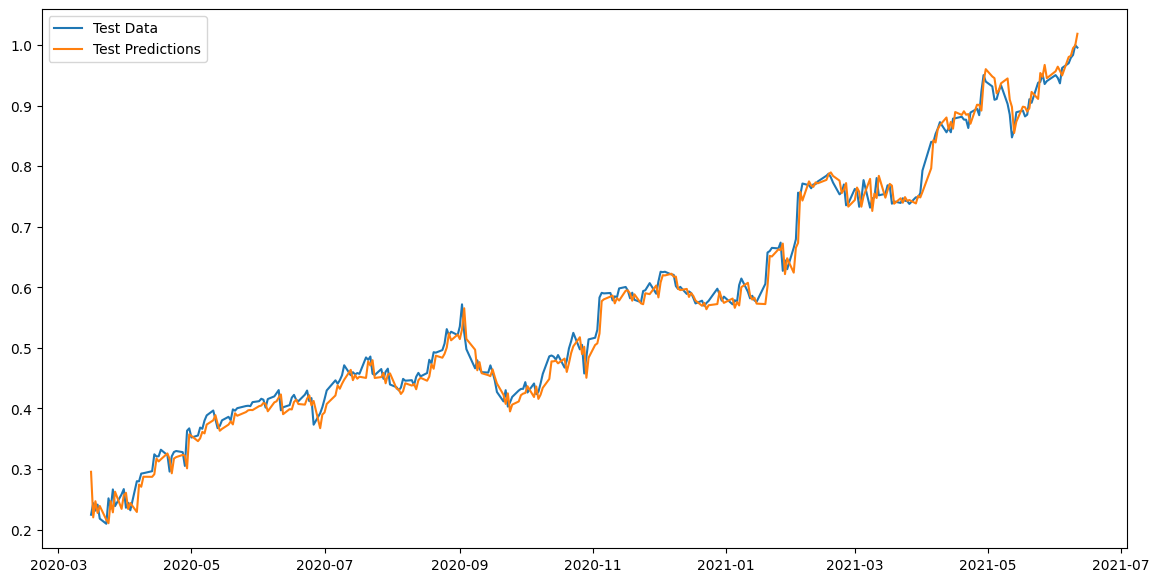

In [64]:
#Making and plotting the predictions for test (and validation) dataset
test_predictions = model.predict(X_test).flatten()
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(14, 7))
plt.plot(dates_test,Y_test)
plt.plot(dates_test,test_predictions)
plt.legend(['Test Data', 'Test Predictions'])

In [65]:
#Inverse transforming the predictions and original values
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten()
data['close_orig'] = scaler.inverse_transform(data['close'].values.reshape(-1, 1))

<ipython-input-65-a6d2680f3f97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_orig'] = scaler.inverse_transform(data['close'].values.reshape(-1, 1))


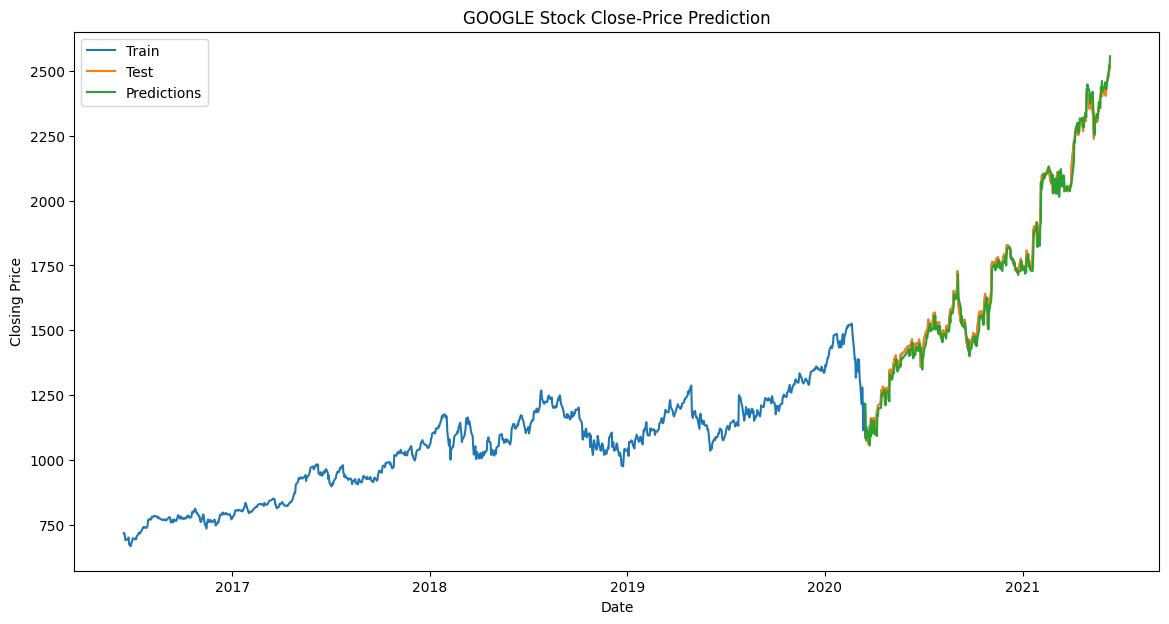

In [66]:
#Plotting the predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index,data['close_orig'],label='Train')
plt.plot(dates_test,Y_test_original,label='Test')
plt.plot(dates_test,test_predictions_original,label='Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('GOOGLE Stock Close-Price Prediction')
plt.legend()
plt.show()